<a href="https://colab.research.google.com/github/Ken-huea/Time-series-analysis/blob/main/%E5%85%88%E7%94%9F%E3%81%AEiris%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

accuracyが0.97であり予測できているので正解です。
​
さらによいaccuracyにしたい場合、
モデルを以下のようにするとよいでしょう。

分類問題ではsigmoidはよく使うことができます。
中間層はやや大きめの数字にしておくとよいでしょう。
128や256ですとaccuracyが下がる傾向があります。


```
model = Sequential()
model.add(Dense(10, input_dim=4))    # 入力層4ノード, 隠れ層に10ノード, 全結合
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(3)) # 出力層3ノード,全結合
model.add(Activation("sigmoid"))
```
​
エポックは500、バッチを32として学習するとtest accuracyが1になります。
history = model.fit(x_train, y_train, epochs=500, batch_size=32) # 学習

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Activation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow.keras.utils as np_utils

### パート１
・データ取得

・説明変数標準化

・目的変数one hot encording


データを取得、分割、標準化まで。

In [ ]:
iris = datasets.load_iris() # データを取得
x = iris.data   # 花の特徴量、長さなど
y = iris.target # 0, 1, 2のラベル

説明変数を標準化、目的変数をone hot encordingに

In [ ]:
x = preprocessing.scale(x)  # 標準化。　標準化して再度説明変数に格納。
y = np_utils.to_categorical(y)  # one-hotエンコード.例) 1 => [0, 1, 0]

データ分割

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)    # 教師データとテストデータに分割

### モデルの生成と学習

In [ ]:
# モデルの生成
model = Sequential()
model.add(Dense(10, input_dim=4))    # 入力層4ノード, 隠れ層に10ノード, 全結合
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(3)) # 出力層3ノード,全結合
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss="categorical_crossentropy",   # 誤差関数
              optimizer="adam",     # 最適化手法
              metrics=['accuracy'])

In [ ]:
# 学習
history = model.fit(x_train, y_train, epochs=300, batch_size=32) # 学習

### プロットと評価

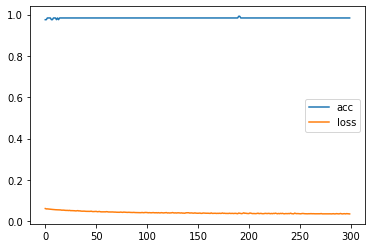

In [ ]:
# 学習過程のプロット
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
# plt.xlabel("epoch")​
plt.legend()

In [ ]:
# 評価
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score", score[0])
print("Test accuracy", score[1])

1/1 [==============================] - 0s 19ms/step - loss: 0.0827 - accuracy: 1.0000
Test score 0.08271916210651398
Test accuracy 1.0


In [ ]:
# 個々のデータを入力して学習できているか見てみる
print("====================================")
print("-----------correct answer-----------")
print(y_test[0])
print(y_test[10])
print("-----------predict answer-----------")
print(np.round(model.predict(x_test)[0]))
print(np.round(model.predict(x_test)[10]))
plt.show()

-----------correct answer-----------
[1. 0. 0.]
[0. 1. 0.]
-----------predict answer-----------
[1. 1. 0.]
[0. 1. 0.]
